<a href="https://colab.research.google.com/github/Ousoka/Cas_Pratique1/blob/main/PROJET_STRIGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJET SUR LES RESEAUX DE NEURONES CONVOLUTIFS

Herbe striga
La striga ou l'herbe des sorcières sont des mauvaises herbes parasites qui affectent les cultures céréalières dans de nombreuses régions d'Afrique, réduisant la production de 30 % à 100 %. Lorsqu'une ferme est infestée de Striga, les plantes affectées atteignent à peine plus d'un pied de haut. La mauvaise herbe ne pousse pas d'elle-même mais se développe en se fixant sur les plantes hôtes. Chaque plant de Striga peut produire jusqu'à 20 000 à 50 000 graines, qui dorment dans le sol jusqu'à ce qu'une céréale soit à nouveau plantée. Cette dormance peut durer plus de 15 ans. Au fur et à mesure que le striga germe, ses racines poussent vers la culture hôte, pénètrent dans les racines de cette culture et commencent à y puiser des nutriments. Cela provoque un rabougrissement sévère de la culture hôte et une perte de rendement.
source : http://push-pull.net/striga/striga.html

Striga, une mauvaise herbe parasite envahissante avec des fleurs de couleur violette, semble frappante et inoffensive. Mais, au-delà de cette marque de beauté, se trouve un monstre suceur de nutriments qui retarde les cultures telles que le maïs et le sorgho, laissant les agriculteurs touchés compter les pertes.
source : https://www.cimmyt.org/news/work-to-develop-high-yielding-striga-tolerant-maize-seed-is-bearing-fruit/

Un Perceptron, c'est la modelisation d'un neurone qui va nous permettre de faire une prediction en sortie.

- Avoir des donnees
- Definir un modele
- Definir une erreur
- utiliser la methode de la descente de gradient pour minimiser l'erreur : elle consiste à modifier les poids à l'entrée pour reduire l'erreur

Maintenant on va considerer un layers qui est composé de plusieurs neurones. Ainsi un reseau de neurones est une interconnection de plusieurs perceptrons qui vont pouvoir faire des combinaisons; une succession d'opérations qui vont nous permettre d'obtenir une sortie. A travers cette sortie, on définie un erreur qu'on doit minimiser en modifiant les poids pour reduire cette erreur.

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
#Import dataset
import pathlib
import os

data_dir = pathlib.Path('/content/drive/MyDrive/Datasets/Dataset')
print(data_dir)
print(os.path.abspath(data_dir))

/content/drive/MyDrive/Datasets/Dataset
/content/drive/MyDrive/Datasets/Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/Datasets/Dataset/")
!ls

Autres	Striga


In [ ]:
image_count = len(list(pathlib.Path('/content/drive/MyDrive/Datasets/Dataset').glob('*/*')))
print(image_count)

159


# Nouvelle section

In [ ]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)


Found 159 files belonging to 2 classes.
Using 128 files for training.
Found 159 files belonging to 2 classes.
Using 31 files for validation.
['Autres', 'Striga']


 tf.keras.
preprocessing : Utilitaires pour prétraiter les données avant la formation.
image_dataset_from_directory(...): Génère un tf.data.Dataset fichier image à partir d'un répertoire.
tf.data.Dataset Représente un ensemble d'éléments potentiellement important.
Dataset l'utilisation suit un schéma commun :
  * Créez un jeu de données source à partir de vos données d'entrée
  * Appliquez des transformations de jeu de données pour prétraiter les données.
  * Itérer sur l'ensemble de données et traiter les éléments.
  
Ensuite, l'appel image_dataset_from_directory(main_directory, labels='inferred') renverra a tf.data.Datasetqui donnera des lots d'images à partir des sous-répertoires class_aet class_b, ainsi que les étiquettes 0 et 1 (0 correspondant à class_a et 1 correspondant à class_b).

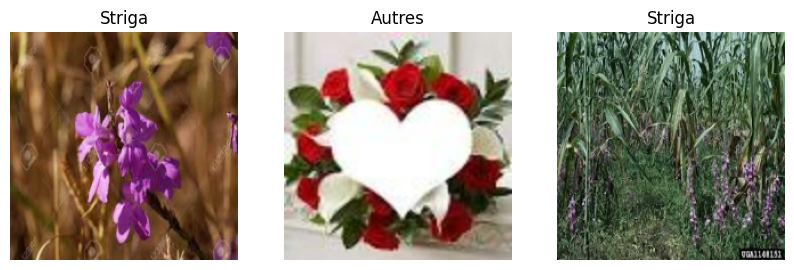

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


* Le paramètre batch_size dans le cas de model.predict correspond uniquement au nombre d'échantillons utilisés pour chaque étape de prédiction.
* Donc, appeler model.predict une fois consomme batch_size nombre d'échantillons de données.
* Cela aide les périphériques capables de traiter rapidement des matrices volumineuses (telles que les GPU).

# Nouvelle section

In [ ]:

from tensorflow.keras import layers

num_classes = 2

# On va effectuer une serie de filtre et pooling (couches) en effectuant une reduction de puissance de 2 une
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'), #convolution permettant de faire des filtres
    layers.MaxPooling2D(), # maxpooling qui va prendre le maximun des sous-matrice
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), #construction d'un vecteur à partir de la matrice obtenueavec la fonction Flatten()
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax') #Avoir la probabilite entre nos differntes classes
])

# Compilation de notre reseaux de neurones
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'],)

logdir="/content/drive/MyDrive/Datasets"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

history = model.fit(
    train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)
# validation_split=0.2 : selectionner 20% de mon jeu d'entrainement pour la validation
# batch_size: entier. Nombre d'échantillons par mise à jour de gradient.
# nb_Epoch: entier, le nombre d'itérations à parcourir sur les tableaux de données d'apprentissage.
#verbose: 0, 1 ou 2. Mode verbosité. 0 = silencieux, 1 = détaillé, 2 = une ligne de journal par époque.

Epoch 1/20
43/43 [==============================] - 56s 1s/step - loss: 0.6946 - accuracy: 0.5938 - val_loss: 0.5683 - val_accuracy: 0.8387
Epoch 2/20
43/43 [==============================] - 52s 1s/step - loss: 0.5651 - accuracy: 0.7734 - val_loss: 0.5279 - val_accuracy: 0.8387
Epoch 3/20
43/43 [==============================] - 54s 1s/step - loss: 0.5456 - accuracy: 0.7734 - val_loss: 0.4125 - val_accuracy: 0.8065
Epoch 4/20
43/43 [==============================] - 52s 1s/step - loss: 0.4765 - accuracy: 0.8125 - val_loss: 0.5205 - val_accuracy: 0.8710
Epoch 5/20
43/43 [==============================] - 53s 1s/step - loss: 0.4644 - accuracy: 0.8203 - val_loss: 0.4299 - val_accuracy: 0.8387
Epoch 6/20
43/43 [==============================] - 53s 1s/step - loss: 0.4318 - accuracy: 0.8203 - val_loss: 0.4153 - val_accuracy: 0.8387
Epoch 7/20
43/43 [==============================] - 53s 1s/step - loss: 0.3746 - accuracy: 0.8516 - val_loss: 0.5019 - val_accuracy: 0.7097
Epoch 8/20
43/43 [==

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)       

{'loss': [0.6945632100105286, 0.5651165246963501, 0.5456123352050781, 0.4764704406261444, 0.46443700790405273, 0.4317770004272461, 0.37455737590789795, 0.27921444177627563, 0.3701228201389313, 0.20669272541999817, 0.16670073568820953, 0.08910400420427322, 0.06874915957450867, 0.11463645845651627, 0.07586084306240082, 0.01637866348028183, 0.013761228881776333, 0.03555122762918472, 0.14014102518558502, 0.3413900136947632], 'accuracy': [0.59375, 0.7734375, 0.7734375, 0.8125, 0.8203125, 0.8203125, 0.8515625, 0.8984375, 0.84375, 0.9296875, 0.9453125, 0.984375, 0.96875, 0.9609375, 0.9765625, 1.0, 1.0, 0.9921875, 0.9453125, 0.8984375], 'val_loss': [0.5682789087295532, 0.5279329419136047, 0.4124869108200073, 0.5204603672027588, 0.4298669397830963, 0.41533857583999634, 0.5018807649612427, 0.3418688178062439, 0.3617557883262634, 0.3576148748397827, 0.39565345644950867, 0.3578706681728363, 0.3231389820575714, 0.4147443175315857, 1.6313354969024658, 0.8597103357315063, 0.5905201435089111, 0.962705

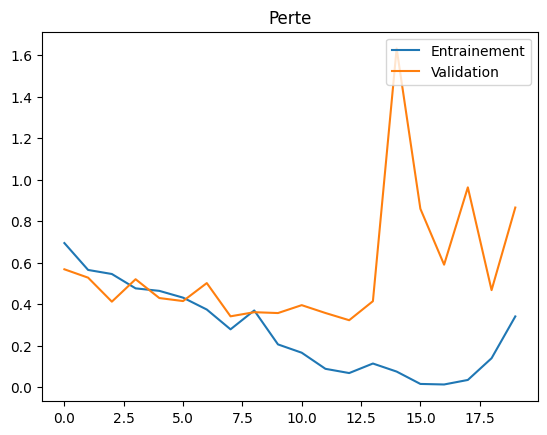

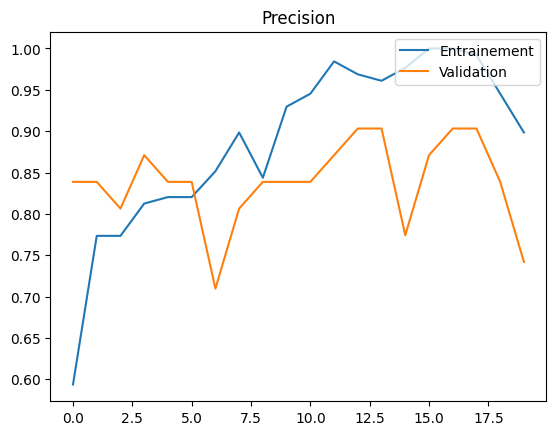

In [ ]:
# val_loss et val_accuracy represente respectivement l'erreur sur la validation et l'erreur sur l'accuracy
print(history.history)
courbe_perte = history.history['loss']
courbe_precision = history.history['accuracy']

courbe_val_perte = history.history['val_loss']
courbe_val_precision = history.history['val_accuracy']


plt.plot(courbe_perte, label='Entrainement')
plt.plot(courbe_val_perte, label='Validation')
plt.legend(loc='upper right')
plt.title('Perte')
plt.show()

plt.plot(courbe_precision, label='Entrainement')
plt.plot(courbe_val_precision, label='Validation')
plt.legend(loc='upper right')
plt.title('Precision')
plt.show()


Saving IMG_20220828_214519.jpg to IMG_20220828_214519.jpg


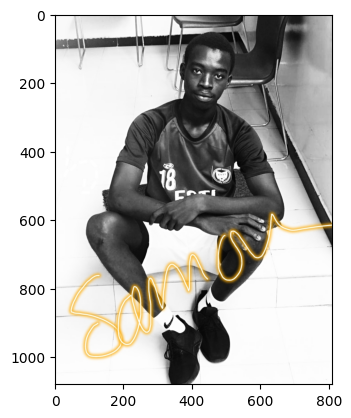

1/1 [==============================] - 0s 78ms/step
[[9.9999154e-01 8.4089706e-06]]
1/1 [==============================] - 0s 85ms/step
[[9.9999154e-01 8.4089706e-06]]
0.9999999451110853
C'EST PAS UNE PLANTE ATTEINTE DE STRIGA


In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = model.predict(img_to_predict)
    print(model.predict(img_to_predict))
    print(model.predict(img_to_predict))
    print(sum(res[0]))
    if int(sum(res[0])) == 1:
        plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'EST UNE PLANTE ATTEINTE DE STRIGA")
    else:
        print("C'EST PAS UNE PLANTE ATTEINTE DE STRIGA")